In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

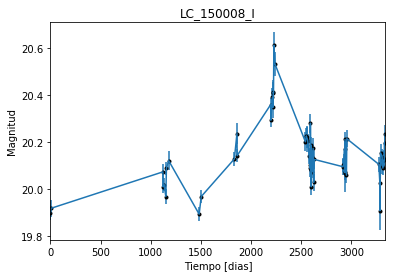

In [2]:
data = np.genfromtxt('LC_150008_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_150008_I')
plt.savefig("LC_150008_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

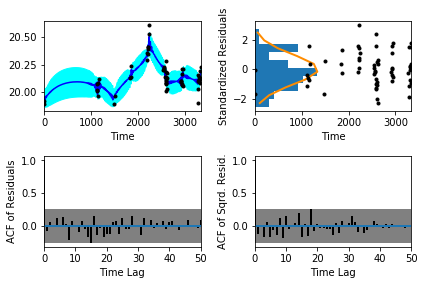

In [5]:
sample.assess_fit()

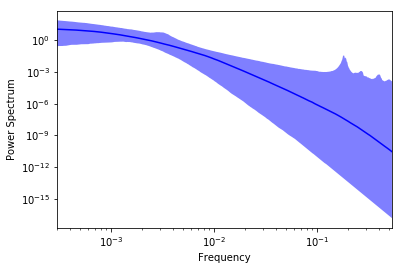

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

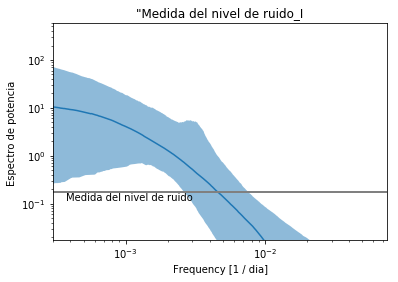

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_150008_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_150008_I')

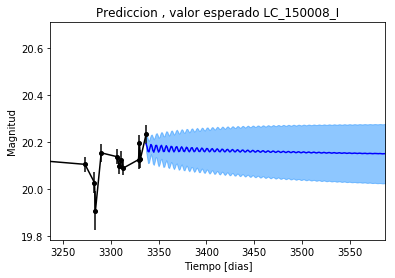

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_150008_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_150008_I')

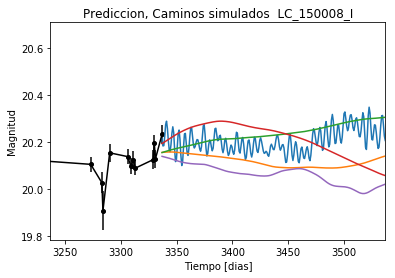

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_150008_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


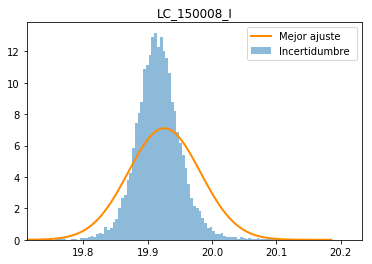

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_150008_I')
plt.savefig("Mejor_ajuste_LC_150008_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_150008_I')

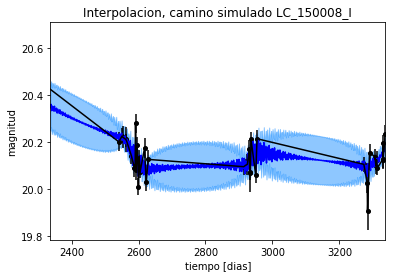

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_I')

Text(0.5,1,'Interpolacion, camino simulado LC_150008_I')

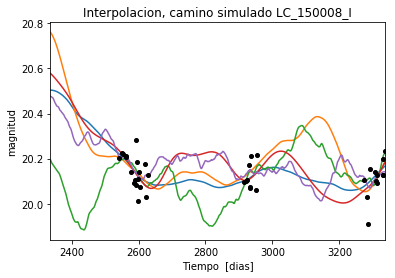

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 428.655851832
Median: 0.00881580042093
Standard deviation: 0.195485524596
68% credibility interval: [ 0.00116781  0.17325133]
95% credibility interval: [  3.71647369e-04   7.81297506e-01]
99% credibility interval: [  3.13618693e-04   9.95161642e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 993.956855143
Median: 0.00268135938975
Standard deviation: 0.0833445317496
68% credibility interval: [ 0.00060274  0.02223434]
95% credibility interval: [ 0.0003335  0.2308263]
99% credibility interval: [  3.08351770e-04   6.41549932e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 344.236401118
Median: 0.0344157357908
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 8539.84355308
Median: 90.3900986776
Standard deviation: 1.86814391883
68% credibility interval: [ 88.65545704  91.54062447]
95% credibility interval: [ 86.06323864  94.5827681 ]
99% credibility interval: [ 84.2577047   95.05112771]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1036.74789526
Median: 0.947051706789
Standard deviation: 2.25185853379
68% credibility interval: [ 0.08346792  4.50902769]
95% credibility interval: [ 0.01956613  7.23421741]
99% credibility interval: [ 0.01209593  9.99997817]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 531.249625119
Median: 0.978607654578
Standard deviation: 8.83984623563
68% credibility interval: [ 0.02973689  9.25134499]
95% credibility interval: [  1.36471335e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1109.35624581
Median: 1.89051996553e-20
Standard deviation: 1.20012776406e+76
68% credibility interval: [  2.06003821e-58   6.98095040e-02]
95% credibility interval: [  7.11728307e-122   1.64193999e+042]
99% credibility interval: [  5.27116275e-125   2.04939342e+076]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2028.91703241
Median: 20.1141617953
Standard deviation: 0.086327478846
68% credibility interval: [ 20.03511816  20.17694333]
95% credibility interval: [ 19.92467813  20.26392103]
99% credibility interval: [ 19.80853883  20.3709173 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 946.049053769
Median: 0.0158211536637
Standard deviation: 0.244721625971
68% credibility interval: [ 0.          0.39536875]
95% credibility interval: [ 0.          0.84789034]
99% credibility interval: [ 0.          1.01134391]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 946.049053769
Median: 0.0158211536637
Standard deviation: 0.244721625971
68% credibility interval: [ 0.          0.39536875]
95% credibility interval: [ 0.          0.84789034]
99% credibility interval: [ 0.          1.01134391]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 778.816490556
Median: 0.0
Standard deviation: 0.0007629765233
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 8539.84355308
Median: 90.3900986776
Standard deviation: 1.86814391883
68% credibility interval: [ 88.65545704  91.54062447]
95% credibility interval: [ 86.06323864  94.5827681 ]
99% credibility interval: [ 84.2577047   95.05112771]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3330.19512374
Median: 0.0282425517714
Standard deviation: 0.0379130091321
68% credibility interval: [ 0.01704134  0.05490598]
95% credibility interval: [ 0.01128454  0.12688936]
99% credibility interval: [ 0.00933067  0.2437144 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 851.865070355
Median: 1.62376648863
Standard deviation: 0.249610104814
68% credibility interval: [ 1.34203466  1.84423615]
95% credibility interval: [ 1.02147454  1.96200654]
99% credibility interval: [ 0.90889194  1.99327133]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 387.468092801
Median: 0.000249846819716
Standard deviation: 0.222712928222
68% credibility interval: [  1.02412506e-06   2.35131094e-02]
95% credibility interval: [  2.85632823e-46   6.51520080e-01]
99% credibility interval: [  1.24694220e-80   1.59003825e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 428.655851832
Median: (-0.0553913076758-4.36866860806j)
Standard deviation: 1.96798415797
68% credibility interval: [-1.08857022+0.j         -0.00733754-4.55507898j]
95% credibility interval: [ -4.90903701e+00+0.j          -2.33512929e-03-0.00684098j]
99% credibility interval: [ -6.25278501e+00+0.j         -1.97052436e-03-0.0184777j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 993.956855143
Median: (-0.016847477921+0.37618543048j)
Standard deviation: 1.62435816738
68% credibility interval: [-0.13970246 +4.31728675e+00j -0.00378713 +4.18651033e-03j]
95% credibility interval: [-1.45032445+1.91573149j -0.00209546+0.00877975j]
99% credibility interval: [ -4.03097711e+00+5.55724824j  -1.93743131e-03+0.j        ]
Posteri